<a href="https://colab.research.google.com/github/thaohung13/Project.cuoi.ky.AI/blob/main/DETECT10FLOWER(92.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir               # lấy danh sách tệp trong thư mục huấn luyện
from numpy import asarray            # chuyển đổi danh sách ảnh và nhãn thành mảng NumPy
from numpy import save               # lưu thành tệp
from keras.utils import load_img     # load_img: để tải ảnh từ tệp
from keras.utils import img_to_array # img_to_array: chuyển đổi thành mảng NumPy
import numpy as np
import matplotlib.pyplot as plt
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# đoạn mã này được sử dụng để tải các tệp ảnh và nhãn tương ứng từ thư mục trên Google Drive
# chuẩn bị chúng cho việc huấn luyện mô hình học máy.
folder = '/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/DATA2/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hong'):
    output = 0
  if file.startswith('Su'):
    output = 1
  if file.startswith('Sen'):
    output = 2
  if file.startswith('Mai'):
    output = 3
  if file.startswith('PhongLuDo'):
    output = 4
  if file.startswith('HongMon'):
    output = 5
  if file.startswith('ThienDieu'):
    output = 6
  if file.startswith('CucVanTho'):
    output = 7
  if file.startswith('HuongDuong'):
    output = 8
  if file.startswith('DaUyenThao'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo) # Chuyển đổi ảnh thành một mảng NumPy
  photos.append(photo)  # Thêm mảng ảnh vào danh sách photos
  labels.append(output) # Thêm giá trị output tương ứng vào danh sách labels

# lưu trữ các mảng numpy photos và labels
photos= asarray(photos) # Chuyển danh sách ảnh thành một mảng NumPy
labels= asarray(labels) # Chuyển danh sách nhãn thành một mảng NumPy
print(photos.shape, labels.shape) # In ra kích thước của mảng ảnh và mảng nhãn
# photos.shape trả về kích thước của mảng photos, được biểu diễn dưới dạng một tuple (số lượng phần tử theo chiều dọc, số lượng phần tử theo chiều ngang, số lượng kênh màu)
# labels.shape: trả về ảnh
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_PHOTOS2', photos)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_LABELS2', labels)

(1238, 128, 128, 3) (1238,)


In [13]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_PHOTOS2.npy')
labels = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_LABELS2.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [14]:
model = Sequential()#Sequential:Sự tuần tự/ Các lớp kế tiếp tuần tự nhau
# khởi tạo một mô hình mạng neural convolutional (CNN)
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))#Conv2D: lớp tích chập 2 chiều dùng để trích xuất đặc trưng của ảnh
model.add(MaxPooling2D((2,2), padding= 'same'))#MaxPooling2D: lấy mẫu các đặc trưng xuống từ các lớp 'Conv2D'

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

#Đưa vào ANN, bộ ANN để phân loại:
#Tín hiệu xác suất => Hàm Relu|Softmax(Hàm chỉnh lưu tuyến tính)
model.add(Flatten())# Flatten:chuyển đổi đầu ra của lớp 'MaxPooling2D' tạo ra một vectơ phẳng để đưa vào bộ phân loại
model.add(Dense(512, activation= 'relu'))#hàm truyền là hàm relu()
model.add(Dropout(0.5))#Dropout:loại bỏ một số đơn vị (neurons) trong mạng neural ngẫu nhiên trong quá trình huấn luyện
model.add(Dense(512, activation= 'relu'))#Densese: sự kết nối từ 1 tế bào tới đầy đủ các Tế bào
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)       

In [15]:
#ImageDataGenerator:Giúp tăng cường hình ảnh cho học sâu
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
    rescale=1./255,
	width_shift_range=0.2,
    height_shift_range=0.2,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [16]:
# Training 
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=200,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-16-e3ce0a308667>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/200
16/16 [==============================] - 8s 456ms/step - loss: 2.1897 - accuracy: 0.2737 - val_loss: 2.1701 - val_accuracy: 0.2298
Epoch 2/200
16/16 [==============================] - 6s 385ms/step - loss: 2.0245 - accuracy: 0.3061 - val_loss: 1.9330 - val_accuracy: 0.2863
Epoch 3/200
16/16 [==============================] - 7s 468ms/step - loss: 1.8220 - accuracy: 0.3141 - val_loss: 1.9000 - val_accuracy: 0.2581
Epoch 4/200
16/16 [==============================] - 5s 317ms/step - loss: 1.7414 - accuracy: 0.3232 - val_loss: 1.6595 - val_accuracy: 0.3306
Epoch 5/200
16/16 [==============================] - 6s 351ms/step - loss: 1.5725 - accuracy: 0.3687 - val_loss: 1.6730 - val_accuracy: 0.3911
Epoch 6/200
16/16 [==============================] - 5s 320ms/step - loss: 1.4842 - accuracy: 0.4242 - val_loss: 1.2422 - val_accuracy: 0.5444
Epoch 7/200
16/16 [==============================] - 6s 410ms/step - loss: 1.3522 - accuracy: 0.4606 - val_loss: 1.2391 - val_accuracy: 0.5282

In [17]:
#Đoạn code này đánh giá độ chính xác và sự mất mát của mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 1s 34ms/step - loss: 69.8382 - accuracy: 0.9234
Accuracy: 0.9233871102333069
Loss: 69.83819580078125


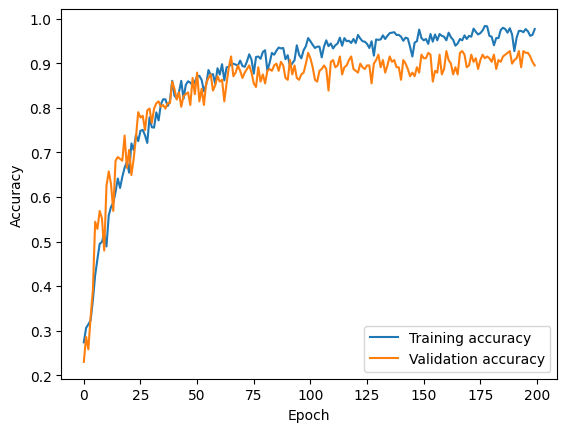

In [18]:
# vẽ sơ đồ độ chính xác của quá trình đào tạo và thực tế qua các lần học
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'], label='Training accuracy')
plt.plot(train.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
#Save model
model.save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/MODEL1.h5')